# Confronto fra Algoritmi di Ordinamento: Insertion Sort e Counting Sort
###### Alessandro Longo - Matricola 7073783

## 1. Introduzione
Un algoritmo di ordinamento consiste in una serie di operazioni che prendono in ingresso una lista di valori e restituiscono gli una lista che contiene gli stessi valori, ma in ordine crescente (o decrescente).
Esistono moltissimi algoritmi di ordinamento, ognuno caratterizzato principio di base, complessità, comportamento nel caso peggiore, medio e migliore, risorse necessarie per il funzionamento, ecc.
In questo Jupyter Notebook si vogliono analizzare gli algoritmi di insertion sort e counting sort e il tempo che impiegano a ordinare una lista di interi in condizioni diverse.

## 2. Gli algoritmi
### 2.1. Insertion Sort
L'algoritmo insertion sort è un algoritmo di ordinamento "in place", cioè che ordina la lista senza doverne creare una copia, risparmiando memoria. È uno dei più semplici anche per il fatto che è molto simile a come un essere umano risolverebbe un problema: prende un elemento alla volta partendo dal secondo (il primo è già intrinsecamente ordinato) e si scorre la parte di lista già ordinata finché non si trova un posto in cui l'elemento precedente è minore e quello successivo è maggiore.
Un esempio pratico potrebbe essere prendere una carta alla volta da un mazzo di carte e sistemarla nella mano scorrendo da destra (elemento con valore massimo) finché non si trova il suo posto.

In [11]:
def insertion_sort(arr):
    # Scorre attraverso tutti gli elementi a partire dal secondo
    for i in range(1, len(arr)):
        key = arr[i]

        # Muove gli elementi di arr[0...i-1] che sono maggiori di key
        # alla loro posizione successiva rispetto alla posizione corrente
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1

        # Inserisce l'elemento nella posizione corretta
        arr[j + 1] = key

Si può intuitivamente concludere che il caso migliore si verifica quando gli elementi della lista sono già ordinati: in questo caso, infatti, il corpo del ciclo while non viene mai eseguito, quindi il costo per ogni esecuzione del ciclo for è costante.
Il caso peggiore, invece, si verifica quando si dà in ingresso una lista ordinata al contrario: il corpo del ciclo while deve essere eseguito un numero di volte pari al numero di elementi già ordinati, rendendo il costo totale quadratico rispetto al numero di elementi.
Per il caso medio, ci si può aspettare comunque una complessità quadratica perché il corpo del ciclo while sarà, in media, eseguito un numero di volte pari alla metà del numero di elementi già ordinati.

In [12]:
# Esempio di utilizzo
lista_da_ordinare = [12, 11, 13, 5, 6]
insertion_sort(lista_da_ordinare)
print('Lista ordinata:', lista_da_ordinare)

Lista ordinata: [5, 6, 11, 12, 13]


### 2.2. Counting Sort
Il counting sort è un algoritmo di ordinamento non in place: esso necessita una conoscenza a priori dell'elemento massimo della lista da ordinare, che può essere scoperto con un primo ciclo; dopo aver creato un array di appoggio, il secondo ciclo scorre la lista iniziale per contare le occorrenze dei valori e lo riempie; l'ultimo ciclo scorre la lista appena creata per ricreare la lista ordinata di uscita.

In [13]:
def counting_sort(arr):
    # Trova il valore massimo nella lista
    max_val = arr[0]
    for i in range(len(arr)):
        max_val = arr[i] if arr[i] > max_val else max_val

    # Crea un array di conteggio con dimensione pari al valore massimo + 1
    count = [0] * (max_val + 1)

    # Conta le occorrenze di ciascun elemento nella lista
    for num in arr:
        count[num] += 1

    # Ricostruisce la lista ordinata utilizzando l'array di conteggio
    sorted_arr = []
    for i in range(len(count)):
        sorted_arr.extend([i] * count[i])

    return sorted_arr


def counting_sort_opt(arr):
    # Trova il valore minimo e massimo nella lista
    min_val = arr[0]
    max_val = arr[0]
    for i in range(len(arr)):
        min_val = arr[i] if arr[i] < max_val else min_val
        max_val = arr[i] if arr[i] > max_val else max_val

    # Crea un array di conteggio con dimensione pari al valore massimo + 1
    count = [0] * (max_val - min_val + 1)

    # Conta le occorrenze di ciascun elemento nella lista
    for num in arr:
        count[num - min_val] += 1

    # Ricostruisce la lista ordinata utilizzando l'array di conteggio
    sorted_arr = []
    for i in range(len(count)):
        sorted_arr.extend([i + min_val] * count[i])

    return sorted_arr

Questo ordinamento ha complessità lineare perché consiste di singoli cicli for non annidati e il caso migliore, peggiore e medio hanno tutti la stessa complessità, ma è importante notare che la lista di appoggio ha dimensione pari al massimo elemento di quella di ingresso: in casi particolari come l'ordinamento della lista (0, 999) è molto inefficiente perché deve creare e scorrere due volte una lista di 1000 elementi.

Di conseguenza, spesso si controlla prima l'intervallo di valori da ordinare per ottimizzare l'algoritmo. Se per esempio di dovessero ordinare le date di nascita di studenti universitari, non avrebbe senso creare una lista di appoggio di oltre 2000 valori, ma sarebbe necessaria una di qualche decina al massimo.

In [14]:
# Esempio di utilizzo
lista_da_ordinare = [4, 2, 3, 1, 4, 2, 1]
lista_ordinata = counting_sort(lista_da_ordinare)
print('Lista ordinata:', lista_ordinata)

lista_da_ordinare = [104, 102, 103, 101, 104, 102, 101]
lista_ordinata = counting_sort_opt(lista_da_ordinare)
print('Lista ordinata:', lista_ordinata)

Lista ordinata: [1, 1, 2, 2, 3, 4, 4]
Lista ordinata: [101, 101, 102, 102, 103, 104, 104]


## 3. Testing
### 3.1. Descrizione e modalità di plotting
Per testare le performance di questi due algoritmi di ordinamento ho pensato di progettare due tipi di test: nella prima parte verranno effettuati test su liste di dimensioni esponenzialmente maggiori per confermare quanto detto sui casi migliori, peggiori e medi; nella seconda parte verranno progettati test ad hoc per analizzare le caratteristiche intrinseche dei due algoritmi.

Tutti i grafici generati rappresentano le performance temporali di entrambi gli algoritmi, eseguiti sulla stessa lista in ingresso e sovrapposte sugli stessi assi per una migliore lettura. Le funzioni utilizzate sono le seguenti: plotGraphs prende in ingresso il numero di valori da inserire e dopo aver definito la lista di algoritmi di ordinamento e modalità di creazioni delle liste, crea una riga di tre grafici e chiama la funzione plotTimeComparisonGraph per riempirli. Quest'ultima, scorre il numero di valori di ingresso voluti e, per ogni algoritmo di ordinamento, traccia il grafico del tempo impiegato per ordinare la lista, segnando i punti (i, tempo per ordinare la lista di lunghezza i).

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random


def generateAlmostSortedList(size, percent_ordered):
    ordered_list = list(range(1, size + 1))

    num_elements_to_shuffle = int((100 - percent_ordered) / 100 * size)

    for _ in range(num_elements_to_shuffle):
        index1, index2 = random.sample(range(size), 2)
        ordered_list[index1], ordered_list[index2] = ordered_list[index2], ordered_list[index1]

    return ordered_list
        

def plotTimeComparisonGraph(arraySize, algorithms, mode, modeDetails = None):
    algorithms_graphs = []
    for i in range(len(algorithms)):
        algorithms_graphs.append({
            'x': [],
            'y': [],
        })
        
    for i in range(1, arraySize):
        A = np.array(0)
        match mode:
            case 'ascending':
                A = np.arange(i)
            case 'descending':
                A = np.arange(i, 0, -1)
            case 'random':
                A = random.sample(range(i), i)
            case 'almost sorted':
                A = generateAlmostSortedList(i, modeDetails)
            case 'interval':
                A = [random.randint(modeDetails[0], modeDetails[1]) for _ in range(i)]

        for alg, algorithm in enumerate(algorithms):
            start = time.perf_counter()
            match algorithm:
                case 'insertion sort':
                    insertion_sort(A)
                case 'counting sort':
                    counting_sort(A)
                case 'optimized counting sort':
                    counting_sort_opt(A)
            end = time.perf_counter()
    
            algorithms_graphs[alg]['x'].append(i)
            z = algorithms_graphs[alg]['y'][-1] if (len(algorithms_graphs[alg]['y']) != 0) else 0
            algorithms_graphs[alg]['y'].append((end - start) / i + z)

    for alg, algorithm in enumerate(algorithms):
        plt.plot(algorithms_graphs[alg]['x'], algorithms_graphs[alg]['y'], label=algorithm)

### 3.2. Test casi generali
#### 3.2.1. 10 elementi
Con 10 elementi i tempi di ordinamento sono ancora molto instabili ed è difficile trarre informazioni utili.

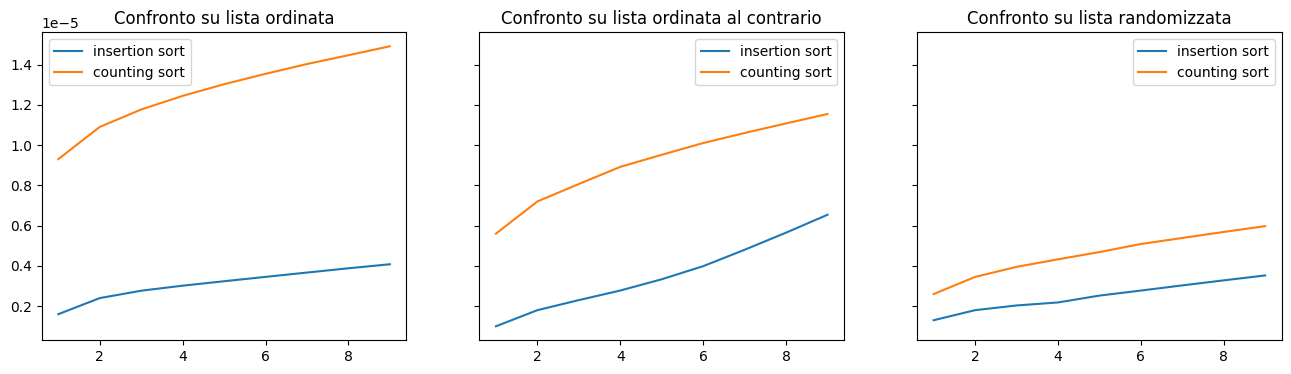

In [16]:
algorithms = ['insertion sort', 'counting sort']
modes = ['ascending', 'descending', 'random']
titles = ['Confronto su lista ordinata', 'Confronto su lista ordinata al contrario', 'Confronto su lista randomizzata']
arraySize = 10

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

for ax, mode in enumerate(modes):
    plt.sca(axes[ax])
    plt.title(titles[ax])
    plotTimeComparisonGraph(arraySize, algorithms, mode)
    plt.legend()

plt.show()

#### 3.2.2. 100 elementi
Con 100 elementi si delineano già molto più chiaramente gli andamenti asintotici nelle tre modalità di generazione delle liste: per la lista ordinata i due algoritmi performano allo stesso modo, con una complessità costante; per la lista ordinata al contrario, come previsto, l'insertion sort presenta un andamento quadratico, mentre il counting sort rimane costante; infine, per la lista randomizzata, l'insertion sort ha tempi di ordinamento molto inferiori ma pur sempre maggiore rispetto al counting sort, che rimane la soluzione migliore. 

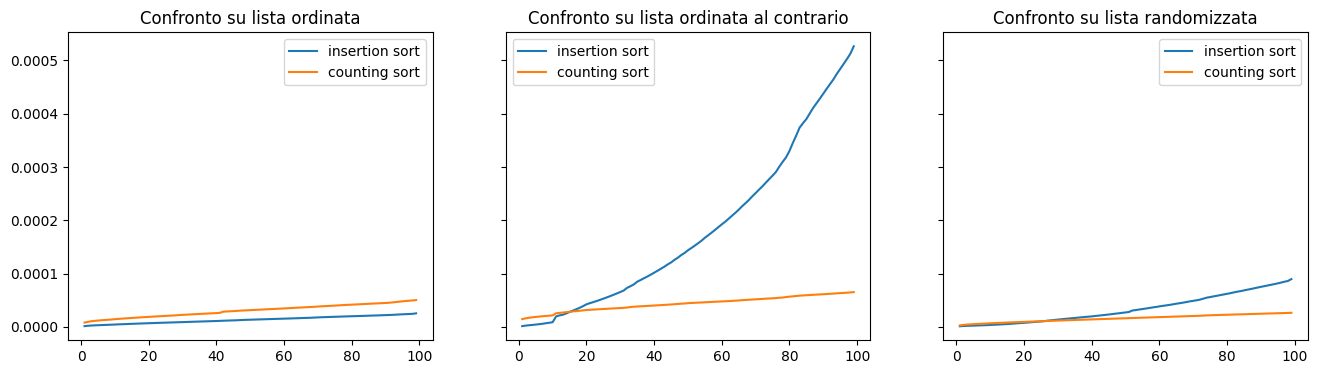

In [17]:
algorithms = ['insertion sort', 'counting sort']
modes = ['ascending', 'descending', 'random']
titles = ['Confronto su lista ordinata', 'Confronto su lista ordinata al contrario', 'Confronto su lista randomizzata']
arraySize = 100

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

for ax, mode in enumerate(modes):
    plt.sca(axes[ax])
    plt.title(titles[ax])
    plotTimeComparisonGraph(arraySize, algorithms, mode)
    plt.legend()

plt.show()

#### 3.2.3. 1000 elementi
Con 1000 elementi i risultati sono facilmente leggibili e confermano quanto osservato con 100 elementi: le curve sono più stabili e mostrano chiaramente le complessità dei due algoritmi a confronto.

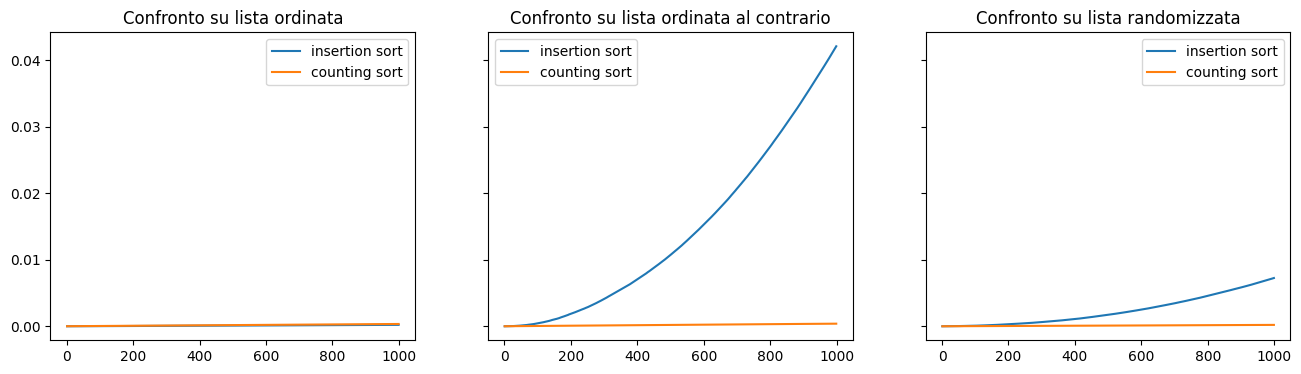

In [18]:
algorithms = ['insertion sort', 'counting sort']
modes = ['ascending', 'descending', 'random']
titles = ['Confronto su lista ordinata', 'Confronto su lista ordinata al contrario', 'Confronto su lista randomizzata']
arraySize = 1000

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

for ax, mode in enumerate(modes):
    plt.sca(axes[ax])
    plt.title(titles[ax])
    plotTimeComparisonGraph(arraySize, algorithms, mode)
    plt.legend()

plt.show()

### 3.3. Test ad hoc
In questa seconda parte si prendono in considerazione sempre liste da ordinare di 1000 elementi perché più facilmente interpretabili.
#### 3.3.1. Ordinamento su lista quasi ordinata
In questo primo test si vuole analizzare il comportamento dell'insertion sort quando prende in ingresso una lista quasi ordinata, cioè una lista in cui la maggior parte dei valori sono già ordinati, mentre una piccola parte sono posizionati in modo randomico.
Considerando il funzionamento dell'insertion sort, l'aspettativa è che, minore il numero di valori posizionati randomicamente nella lista di ingresso, più l'andamento sarà vicino a quello ottenuto per una lista ordinata.

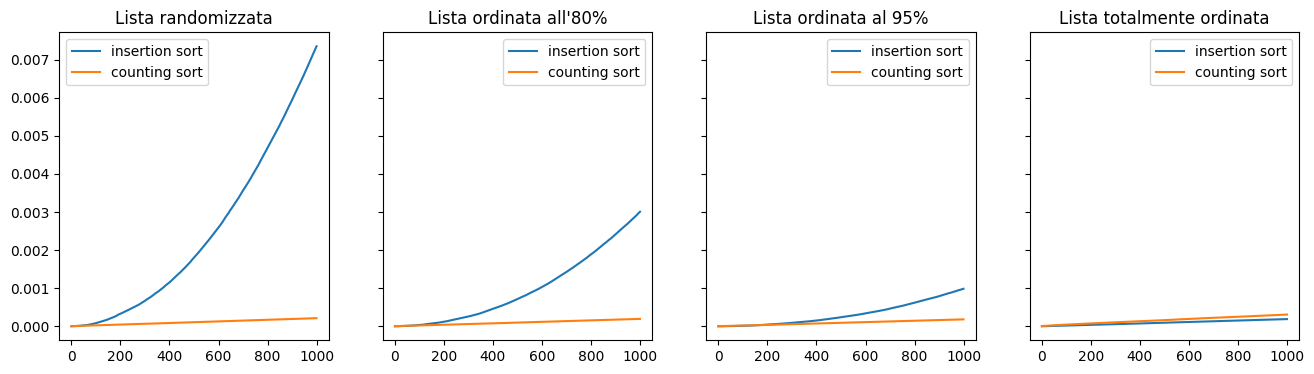

In [19]:
algorithms = ['insertion sort', 'counting sort']
modes = ['random', 'almost sorted', 'almost sorted', 'ascending']
modeDetails = [None, 80, 95, None]
titles = ['Lista randomizzata', 'Lista ordinata all\'80%', 'Lista ordinata al 95%', 'Lista totalmente ordinata']

arraySize = 1000

fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for ax, mode in enumerate(modes):
    plt.sca(axes[ax])
    plt.title(titles[ax])
    plotTimeComparisonGraph(arraySize, algorithms, mode, modeDetails[ax])
    plt.legend()

plt.show()

#### 3.3.2. Ordinamento di valori in un intervallo
Per quest'ultimo test si vuole mettere in evidenza la caratteristica del counting sort per la quale la dimensione della lista di appoggio è lunga quanto il valore massimo della lista di ingresso. Dando in ingresso sempre lo stesso numero di valori distribuiti su un intervallo della stessa ampiezza ma con estremo superiore sempre maggiore, si può osservare come l'algoritmo performi molto peggio rispetto all'insertion sort.
In questo caso, però, introducendo l'ottimizzazione descritta sopra l'algoritmo torna a essere una scelta migliore.

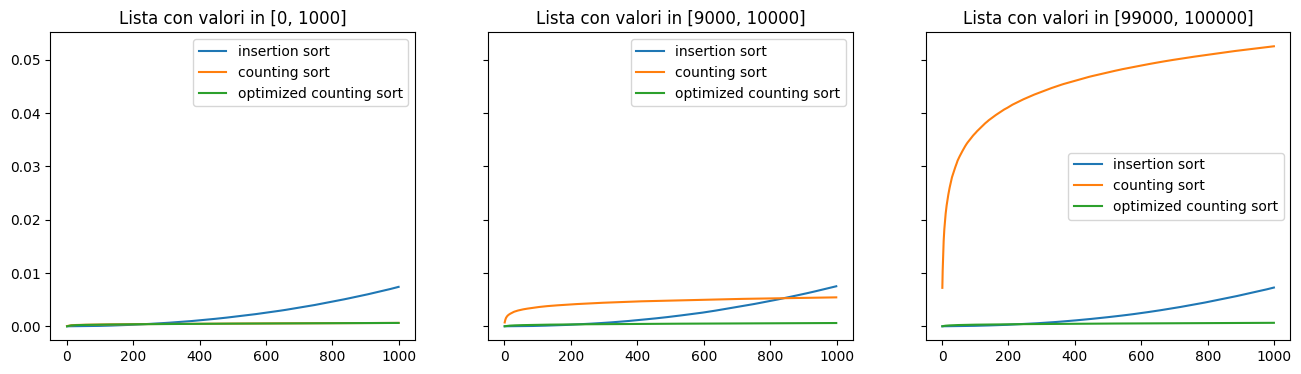

In [20]:
algorithms = ['insertion sort', 'counting sort', 'optimized counting sort']
modes = ['interval', 'interval', 'interval']
modeDetails = [[0, 1000], [9000, 10000], [99000, 100000]]
titles = ['Lista con valori in [0, 1000]', 'Lista con valori in [9000, 10000]', 'Lista con valori in [99000, 100000]']

arraySize = 1000

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

for ax, mode in enumerate(modes):
    plt.sca(axes[ax])
    plt.title(titles[ax])
    plotTimeComparisonGraph(arraySize, algorithms, mode, modeDetails[ax])
    plt.legend()

plt.show()

## 4. Conclusioni
In conclusione, si può affermare che, nella maggior parte dei casi, il counting sort è più veloce rispetto all'insertion sort e ha complessità lineare rispetto al numero di valori della lista di ingresso contro la complessità quadratica dell'altro. Bisogna tenere conto però che ci sono dei casi particolari dove è preferibile utilizzare l'insertion sort, per esempio quando non si ha memoria aggiuntiva a disposizione e si è costretti a utilizzare un algoritmo in-place, oppure quando la nostra implementazione del counting sort non presenta alcuna ottimizzazione e si ha a che fare con valori molto grandi rispetto alla lunghezza della lista stessa.